In [115]:
%matplotlib notebook

In [116]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [117]:
clinical_trial_data = pd.read_csv("../data/clinicaltrial_data.csv")
mouse_drug_data = pd.read_csv("../data/mouse_drug_data.csv")

In [118]:
clinical_trial_data.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [119]:
mouse_drug_data.count()

Mouse ID    250
Drug        250
dtype: int64

In [120]:
clinical_trial_data.head(10)

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0
5     h246          0                45.0                 0
6     p189          0                45.0                 0
7     n923          0                45.0                 0
8     q119          0                45.0                 0
9     f993          0                45.0                 0

In [121]:
mouse_drug_data.head(10)

Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn
5     o848  Stelasyn
6     z314  Stelasyn
7     g989  Stelasyn
8     m269  Stelasyn
9     a963  Stelasyn

In [122]:
merged_df = pd.merge(clinical_trial_data, mouse_drug_data, how="left", on="Mouse ID")

In [123]:
merged_df.head(5)

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites       Drug
0     b128          0                45.0                 0  Capomulin
1     f932          0                45.0                 0   Ketapril
2     g107          0                45.0                 0   Ketapril
3     a457          0                45.0                 0   Ketapril
4     c819          0                45.0                 0   Ketapril

In [124]:
groupby_drugtime_df = merged_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"]
mean_tumor_vol = groupby_drugtime_df.mean()
mean_tumor_vol = pd.DataFrame(mean_tumor_vol)
mean_tumor_vol.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [125]:
sem_tumor = groupby_drugtime_df.sem()
sem_tumor_df = pd.DataFrame(sem_tumor)
sem_tumor_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

<IPython.core.display.Javascript object>


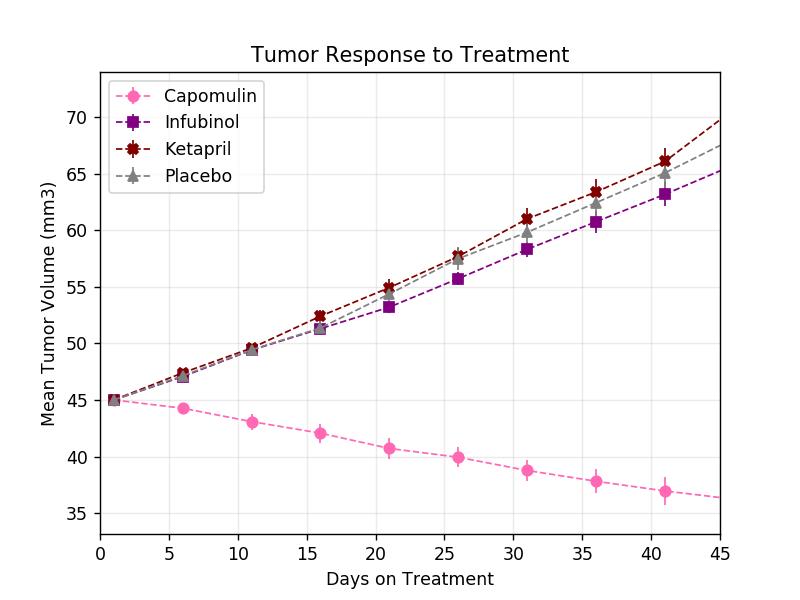

In [126]:
fig, ax = plt.subplots()

ax.errorbar(np.arange(1, 50, 5), mean_tumor_vol.loc["Capomulin", "Tumor Volume (mm3)"], yerr = sem_tumor_df.loc["Capomulin","Tumor Volume (mm3)"], fmt="o--", linewidth = 1, color="hotpink", label="Capomulin")
ax.errorbar(np.arange(1, 50, 5), mean_tumor_vol.loc["Infubinol", "Tumor Volume (mm3)"], yerr = sem_tumor_df.loc["Infubinol","Tumor Volume (mm3)"], fmt="s--", linewidth = 1, color ="purple", label="Infubinol")
ax.errorbar(np.arange(1, 50, 5), mean_tumor_vol.loc["Ketapril", "Tumor Volume (mm3)"], yerr = sem_tumor_df.loc["Ketapril","Tumor Volume (mm3)"], fmt="X--", linewidth = 1, color="maroon", label="Ketapril")
ax.errorbar(np.arange(1, 50, 5), mean_tumor_vol.loc["Placebo", "Tumor Volume (mm3)"], yerr = sem_tumor_df.loc["Placebo","Tumor Volume (mm3)"], fmt="^--", linewidth = 1, color="grey", label="Placebo")

ax.set_xlim(0, 45, 5)
ax.legend(loc="best")
ax.grid(alpha = 0.25)
ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Days on Treatment")
ax.set_ylabel("Mean Tumor Volume (mm3)")
plt.savefig("Tumor Response to Treatment")


In [14]:
#sem_pivot = sem_tumor_df.pivot(index="Timepoint", columns="Drug")
#sem_pivot.head()

#Find Metstatic Response
groupby_metasites = merged_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"]
mean_sites = groupby_metasites.mean()
sites_df = pd.DataFrame(mean_sites)
sites_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [127]:
#get sem
sem_meta = groupby_metasites.sem()
sem_meta_df = pd.DataFrame(sem_meta)
sem_meta_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

<IPython.core.display.Javascript object>


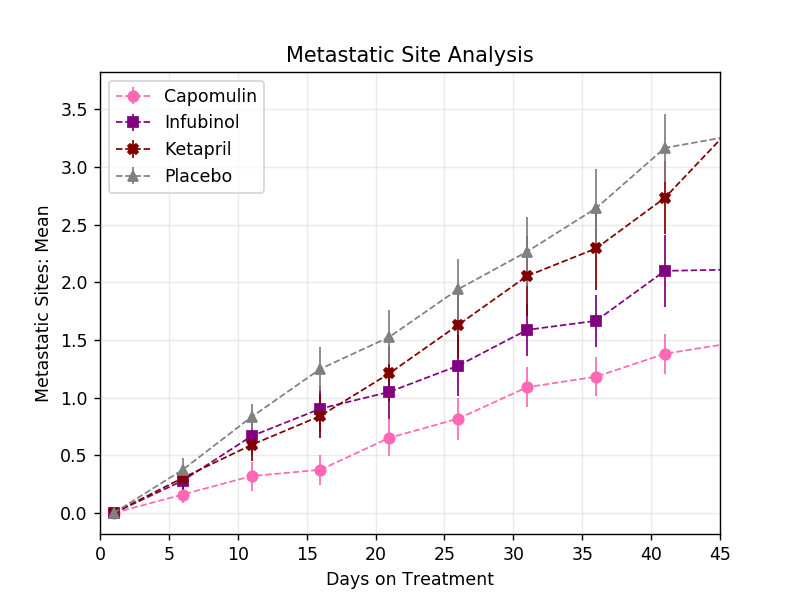

In [128]:
fig2, ax2 = plt.subplots()

ax2.errorbar(np.arange(1, 50, 5), sites_df.loc["Capomulin", "Metastatic Sites"], yerr = sem_meta_df.loc["Capomulin","Metastatic Sites"], fmt="o--", linewidth = 1, color="hotpink", label="Capomulin")
ax2.errorbar(np.arange(1, 50, 5), sites_df.loc["Infubinol", "Metastatic Sites"], yerr = sem_meta_df.loc["Infubinol","Metastatic Sites"], fmt="s--", linewidth = 1, color ="purple", label="Infubinol")
ax2.errorbar(np.arange(1, 50, 5), sites_df.loc["Ketapril", "Metastatic Sites"], yerr = sem_meta_df.loc["Ketapril","Metastatic Sites"], fmt="X--", linewidth = 1, color="maroon", label="Ketapril")
ax2.errorbar(np.arange(1, 50, 5), sites_df.loc["Placebo", "Metastatic Sites"], yerr = sem_meta_df.loc["Placebo","Metastatic Sites"], fmt="^--", linewidth = 1, color="grey", label="Placebo")

ax2.set_xlim(0, 45, 5)
ax2.legend(loc="best")
ax2.grid(alpha = 0.25)
ax2.set_title("Metastatic Site Analysis")
ax2.set_xlabel("Days on Treatment")
ax2.set_ylabel("Metastatic Sites: Mean")
plt.savefig("Metastatic Site Analysis")


In [17]:
groupby_drugtime_mouse = merged_df.groupby(["Drug", "Timepoint"])["Mouse ID"]
mouse_counts = groupby_drugtime_mouse.count()
mouse_counts_df = pd.DataFrame(mouse_counts)
reset_mice = mouse_counts_df.rename(columns={"Mouse ID": "Total Mice"})
reset_mice.head()

Total Mice
Drug      Timepoint            
Capomulin 0                  25
          5                  25
          10                 25
          15                 24
          20                 23

<IPython.core.display.Javascript object>


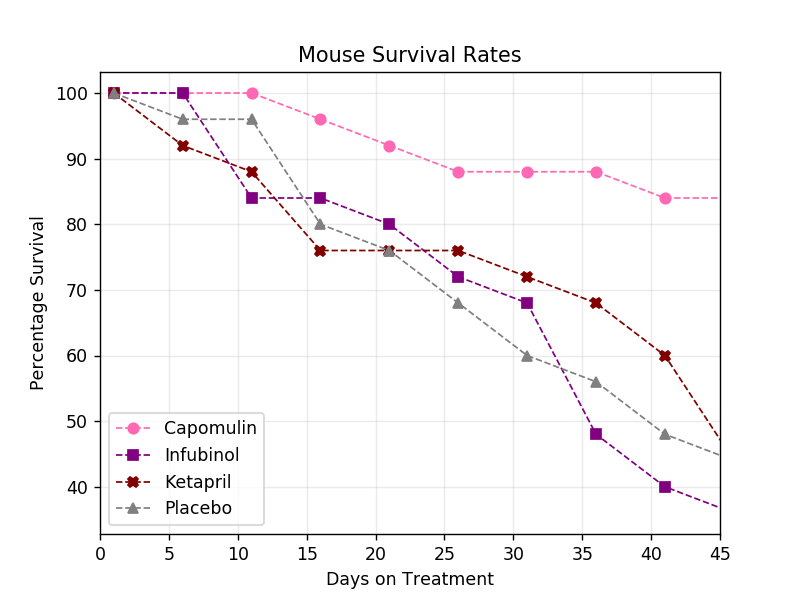

In [129]:
fig3, ax3 = plt.subplots()

ax3.plot(np.arange(1, 50, 5), 100*reset_mice.loc["Capomulin", "Total Mice"]/25, marker="o", linestyle="--", linewidth = 1, color="hotpink", label="Capomulin")
ax3.plot(np.arange(1, 50, 5), 100*reset_mice.loc["Infubinol", "Total Mice"]/25, marker="s", linestyle="--", linewidth = 1, color ="purple", label="Infubinol")
ax3.plot(np.arange(1, 50, 5), 100*reset_mice.loc["Ketapril", "Total Mice"]/25, marker="X", linestyle="--", linewidth = 1, color="maroon", label="Ketapril")
ax3.plot(np.arange(1, 50, 5), 100*reset_mice.loc["Placebo", "Total Mice"]/25, marker="^", linestyle="--", linewidth = 1, color="grey", label="Placebo")

ax3.legend(loc="best")
ax3.grid(alpha = 0.25)
ax3.set_xlim(0,45,5)
ax3.set_title("Mouse Survival Rates")
ax3.set_xlabel("Days on Treatment")
ax3.set_ylabel("Percentage Survival")
plt.savefig("Mouse Survival Rates")



In [47]:
reset_tumor_df = mean_tumor_vol.reset_index()
reset_tumor_df.head()
tumor_pivot = reset_tumor_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
tumor_pivot.head(20)

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   
25         39.939528  54.287674  55.715252  57.678982  56.731968  57.482574   
30         38.769339  56.769517  58.299397  60.994507  59.559509  59.809063   
35         37.816839  58.827548  60.742461  63.371686  62.685087  62.420615   
40         36.958001  61.467895  63.162824  66.068580  65.600754  65.052675   
45         36.236114  64.132421  65.755562  70.662958  69.265506  68.084082   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334  
25         55.504138  38.974300  56.166123  55.432935  
30         58.196374  38.703137  59.826738  57.713531  
35         60.350199  37.451996  62.440699  60.089372  
40         63.045537  36.574081  65.356386  62.916692  
45         66.258529  34.955595  68.438310  65.960888

In [130]:
percent_changes = (tumor_pivot.iloc[-1]/(tumor_pivot.iloc[0])-1)*100
percent_changes

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [131]:
# found code: http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/

def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        
        # Just print the percentage in the center of the bar
        label_position = height/2

        ax.text(rect.get_x() + rect.get_width()/2., label_position,str('%d' % int(height)) + '%',
                ha='center', va='bottom', color = 'w', size = 10)

<IPython.core.display.Javascript object>


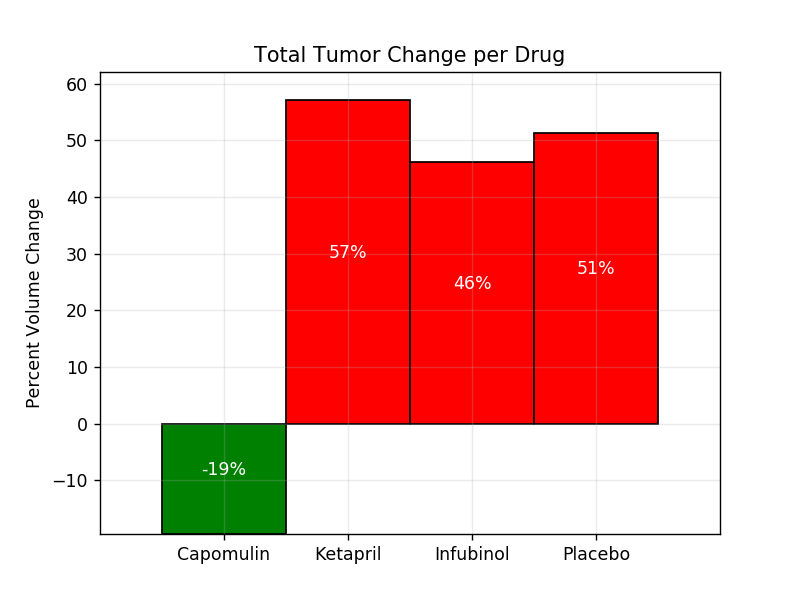

In [132]:
fig4, ax4 = plt.subplots()

x_axis = np.arange(0,4,1)
bars = [percent_changes["Capomulin"], percent_changes["Ketapril"], percent_changes["Infubinol"], percent_changes["Placebo"]]
labels = ["Capomulin", "Ketapril", "Infubinol", "Placebo"]
colors = []

for p in percent_changes:
    if p >= 0:
        colors.append("r")
    else:
        colors.append("g")

barplot = ax4.bar(x_axis, bars, width=1, align="center", color= colors, edgecolor = "black", linewidth= 1, tick_label =labels)

ax4.grid(alpha= 0.25)
ax4.set_xlim(-1, 4)
ax4.set_ylim(min(bars), max(bars)+5)
ax4.set_title("Total Tumor Change per Drug")
ax4.set_ylabel("Percent Volume Change")

autolabel(barplot, ax4)
plt.show()
plt.savefig("Total Tumor Change per Drug")

